## Import Libraries

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split , RandomizedSearchCV , GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import m2cgen
import os
import matplotlib.pyplot as plt
import joblib
from xgboost import XGBClassifier
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_colwidth', None)  # Show full content in each cell
pd.set_option('display.width', 1000)  # Set max width

In [12]:
# motion mapper
mapper = {
    0 : 0,
    1 : 1,
    2 : 1,
    3 : 0,
    4 : 0,
    5 : 0,
    6 : 1
}

## Load Data

In [48]:
dataset_path = os.getcwd().replace('/notebook' , '') + "/dataset/"

# Read training data
imu_df = pd.read_csv(dataset_path + "imu_data.csv")
x = imu_df.iloc[:,:-1]
y = imu_df.iloc[:,-1]

# Modeling

## Motion Classification

In [49]:
motion_y = y.map(mapper)

x1, x_test , y1 , y_test = train_test_split(x ,motion_y ,test_size= 0.2, stratify = y)

x_train , x_val , y_train , y_val = train_test_split(x1 ,y1 ,test_size= 0.2, stratify = y1)

### Random Forest

In [50]:
rf = RandomForestClassifier()

param_dist = {
    'n_estimators' : [2 , 3 , 4 , 6 , 8 , 10],
    'max_depth' : [2 , 3 , 4 , 6 , 8 , 10],
    'criterion' : ['gini', 'entropy']
    }

random_search = GridSearchCV(estimator = rf,
                            param_grid = param_dist,
                            cv = 5,
                            n_jobs=-1
                            )
random_search.fit(x_train, y_train)

cv_results = pd.DataFrame(random_search.cv_results_)
cv_results = cv_results[["mean_test_score", "params"]].sort_values(by="mean_test_score", ascending=False)

cv_results 

,mean_test_score,params
70,0.980223,"{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 8}"
69,0.979434,"{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 6}"
35,0.978925,"{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 10}"
71,0.978518,"{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 10}"
34,0.977449,"{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 8}"
33,0.977322,"{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 6}"
32,0.975998,"{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 4}"
68,0.975566,"{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 4}"
65,0.975438,"{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 10}"
64,0.973758,"{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 8}"


In [51]:
rf = RandomForestClassifier(n_estimators = 3 , max_depth = 10 , criterion= 'entropy')
rf.fit(x_train , y_train)
rf.score(x_val , y_val)
rf_report = classification_report(rf.predict(x_val) , y_val)
print(rf_report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5540
           1       0.97      0.97      0.97      4283

    accuracy                           0.98      9823
   macro avg       0.98      0.98      0.98      9823
weighted avg       0.98      0.98      0.98      9823



In [52]:
rf_train_report = classification_report(rf.predict(x_train) , y_train)
print(rf_train_report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     22039
           1       0.98      0.98      0.98     17250

    accuracy                           0.98     39289
   macro avg       0.98      0.98      0.98     39289
weighted avg       0.98      0.98      0.98     39289



In [53]:
rf_test_report = classification_report(rf.predict(x_test) , y_test)
print(rf_test_report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6902
           1       0.97      0.97      0.97      5376

    accuracy                           0.98     12278
   macro avg       0.98      0.98      0.98     12278
weighted avg       0.98      0.98      0.98     12278



In [54]:
with open(os.getcwd().replace('/notebook' , '') + "/model/motion_model.py" , "w") as f:
  f.write(m2cgen.export_to_python(rf))
print(os.path.getsize(os.getcwd().replace('/notebook' , '') + "/model/rf_model.py" ))

251293


## Steady Movement Classification

In [67]:
steady_df  =imu_df[(imu_df['Target'] == 1) | (imu_df['Target'] == 2) | (imu_df['Target'] == 6)]
x = steady_df.iloc[:,:-1]
y = steady_df.iloc[:,-1]

x1, x_test , y1 , y_test = train_test_split(x , y ,test_size= 0.2, stratify = y)

x_train , x_val , y_train , y_val = train_test_split(x1 ,y1 ,test_size= 0.2, stratify = y1)

### Random Forest

In [68]:
rf = RandomForestClassifier()

param_dist = {
    'n_estimators' : [2 , 3 , 4 , 6 , 8 , 10],
    'max_depth' : [2 , 3 , 4 , 6 , 8 , 10],
    'criterion' : ['gini', 'entropy']
    }

random_search = GridSearchCV(estimator = rf,
                            param_grid = param_dist,
                            cv = 5,
                            n_jobs=-1
                            )
random_search.fit(x_train, y_train)

cv_results = pd.DataFrame(random_search.cv_results_)
cv_results = cv_results[["mean_test_score", "params"]].sort_values(by="mean_test_score", ascending=False)

cv_results 

,mean_test_score,params
71,0.938734,"{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 10}"
35,0.935763,"{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 10}"
70,0.934016,"{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 8}"
34,0.928484,"{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 8}"
33,0.927843,"{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 6}"
69,0.927028,"{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 6}"
32,0.920098,"{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 4}"
68,0.920097,"{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 4}"
65,0.915438,"{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 10}"
62,0.913284,"{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 4}"


In [73]:
rf = RandomForestClassifier(n_estimators = 4 , max_depth = 10 , criterion= 'gini')
rf.fit(x_train , y_train)
rf.score(x_val , y_val)
rf_report = classification_report(rf.predict(x_val) , y_val)
print(rf_report)

              precision    recall  f1-score   support

           1       0.88      0.88      0.88      1442
           2       0.89      0.89      0.89      1447
           6       0.98      0.98      0.98      1404

    accuracy                           0.91      4293
   macro avg       0.92      0.92      0.92      4293
weighted avg       0.91      0.91      0.91      4293



In [74]:
rf_train_report = classification_report(rf.predict(x_train) , y_train)
print(rf_train_report)

              precision    recall  f1-score   support

           1       0.93      0.93      0.93      5788
           2       0.93      0.94      0.93      5726
           6       0.99      0.98      0.98      5657

    accuracy                           0.95     17171
   macro avg       0.95      0.95      0.95     17171
weighted avg       0.95      0.95      0.95     17171



In [75]:
rf_test_report = classification_report(rf.predict(x_test) , y_test)
print(rf_test_report)

              precision    recall  f1-score   support

           1       0.89      0.89      0.89      1812
           2       0.88      0.90      0.89      1780
           6       0.98      0.98      0.98      1774

    accuracy                           0.92      5366
   macro avg       0.92      0.92      0.92      5366
weighted avg       0.92      0.92      0.92      5366



In [76]:
with open(os.getcwd().replace('/notebook' , '') + "/model/steady_model.py" , "w") as f:
  f.write(m2cgen.export_to_python(rf))
print(os.path.getsize(os.getcwd().replace('/notebook' , '') + "/model/steady_model.py" ))

240738


## Unsteady Movement Classification

In [61]:
unsteady_df  =imu_df[(imu_df['Target'] != 1) & (imu_df['Target'] != 2) & (imu_df['Target'] != 6)]
x = unsteady_df.iloc[:,:-1]
y = unsteady_df.iloc[:,-1]

x1, x_test , y1 , y_test = train_test_split(x , y ,test_size= 0.2, stratify = y)

x_train , x_val , y_train , y_val = train_test_split(x1 ,y1 ,test_size= 0.2, stratify = y1)

### Random Forest

In [62]:
rf = RandomForestClassifier()

param_dist = {
    'n_estimators' : [2 , 3 , 4 , 6 , 8 , 10],
    'max_depth' : [2 , 3 , 4 , 6 , 8 , 10],
    'criterion' : ['gini', 'entropy']
    }

random_search = GridSearchCV(estimator = rf,
                            param_grid = param_dist,
                            cv = 5,
                            n_jobs=-1
                            )
random_search.fit(x_train, y_train)

cv_results = pd.DataFrame(random_search.cv_results_)
cv_results = cv_results[["mean_test_score", "params"]].sort_values(by="mean_test_score", ascending=False)

cv_results 

,mean_test_score,params
71,0.786916,"{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 10}"
70,0.780903,"{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 8}"
35,0.778416,"{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 10}"
69,0.774573,"{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 6}"
34,0.767294,"{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 8}"
68,0.766932,"{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 4}"
33,0.763134,"{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 6}"
32,0.758703,"{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 4}"
65,0.752780,"{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 10}"
29,0.745592,"{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 10}"


#### Memory Optimization

In [63]:
rf = RandomForestClassifier(n_estimators = 3 , max_depth = 10 , criterion= 'entropy')
rf.fit(x_train , y_train)
rf.score(x_val , y_val)
rf_report = classification_report(rf.predict(x_val) , y_val)
print(rf_report)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1379
           3       0.68      0.68      0.68      1358
           4       0.87      0.80      0.83      1502
           5       0.62      0.68      0.64      1291

    accuracy                           0.76      5530
   macro avg       0.76      0.76      0.76      5530
weighted avg       0.77      0.76      0.76      5530



In [64]:
rf_train_report = classification_report(rf.predict(x_train) , y_train)
print(rf_train_report)

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      5499
           3       0.73      0.72      0.73      5531
           4       0.89      0.83      0.86      5984
           5       0.66      0.73      0.69      5104

    accuracy                           0.80     22118
   macro avg       0.80      0.79      0.79     22118
weighted avg       0.80      0.80      0.80     22118



In [65]:
rf_test_report = classification_report(rf.predict(x_test) , y_test)
print(rf_test_report)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1729
           3       0.68      0.69      0.68      1675
           4       0.87      0.81      0.84      1864
           5       0.61      0.66      0.64      1644

    accuracy                           0.76      6912
   macro avg       0.76      0.75      0.76      6912
weighted avg       0.76      0.76      0.76      6912



In [66]:
with open(os.getcwd().replace('/notebook' , '') + "/model/unsteady_model.py" , "w") as f:
  f.write(m2cgen.export_to_python(rf))
print(os.path.getsize(os.getcwd().replace('/notebook' , '') + "/model/unsteady_model.py" ))

210491


### Decison Tree

In [13]:
dt = DecisionTreeClassifier()

param_dist = {
    'max_depth' : [5 , 10 , 15 , 20 , 25 , 30 , 50, 75 , 100],
    'criterion' : ['gini' , 'entropy']
    }

random_search = RandomizedSearchCV(estimator = dt,
                                    param_distributions = param_dist,
                                    cv = 5,
                                    random_state=42,
                                    n_jobs=-1
                                    )
random_search.fit(x_train, y_train)

cv_results = pd.DataFrame(random_search.cv_results_)
cv_results = cv_results[["mean_test_score", "params"]].sort_values(by="mean_test_score", ascending=False)

cv_results 

,mean_test_score,params
5,0.942356,"{'max_depth': 25, 'criterion': 'entropy'}"
6,0.940486,"{'max_depth': 75, 'criterion': 'entropy'}"
7,0.939977,"{'max_depth': 50, 'criterion': 'entropy'}"
8,0.939466,"{'max_depth': 15, 'criterion': 'entropy'}"
3,0.937766,"{'max_depth': 30, 'criterion': 'gini'}"
1,0.937764,"{'max_depth': 10, 'criterion': 'gini'}"
9,0.937596,"{'max_depth': 15, 'criterion': 'gini'}"
2,0.935385,"{'max_depth': 100, 'criterion': 'gini'}"
4,0.934874,"{'max_depth': 20, 'criterion': 'gini'}"
0,0.905287,"{'max_depth': 5, 'criterion': 'gini'}"


In [19]:
dt = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 25)
dt.fit(x_train , y_train)
dt.score(x_val , y_val)
dt_test_report = classification_report(dt.predict(x_test_scaled) , y_test)
print(dt_test_report)

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.78      0.82      0.80       465
          STANDING       0.84      0.81      0.83       553
           WALKING       0.92      0.84      0.88       543
WALKING_DOWNSTAIRS       0.83      0.84      0.84       418
  WALKING_UPSTAIRS       0.75      0.82      0.79       431

          accuracy                           0.86      2947
         macro avg       0.85      0.86      0.85      2947
      weighted avg       0.86      0.86      0.86      2947



In [20]:
joblib.dump(dt, os.getcwd().replace('/notebook' , '') + "/model/decison_tree_model.pkl" )
print(os.path.getsize(os.getcwd().replace('/notebook' , '') + "/model/decison_tree_model.pkl" ))

28841


#### Memory Optimization

In [59]:
dt = DecisionTreeClassifier(criterion = 'gini' , max_depth = 10)
dt.fit(x_train , y_train)
dt.score(x_val , y_val)
dt_report = classification_report(dt.predict(x_val) , y_val)
print(dt_report)

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       282
           SITTING       0.93      0.95      0.94       253
          STANDING       0.95      0.94      0.95       279
           WALKING       0.94      0.91      0.92       253
WALKING_DOWNSTAIRS       0.92      0.95      0.93       191
  WALKING_UPSTAIRS       0.92      0.92      0.92       213

          accuracy                           0.95      1471
         macro avg       0.94      0.94      0.94      1471
      weighted avg       0.95      0.95      0.95      1471



In [60]:
dt_train_report = classification_report(dt.predict(x_train) , y_train)
print(dt_train_report)

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1125
           SITTING       0.99      0.99      0.99      1025
          STANDING       0.99      0.99      0.99      1103
           WALKING       0.99      0.99      0.99       983
WALKING_DOWNSTAIRS       0.99      0.99      0.99       787
  WALKING_UPSTAIRS       0.99      0.99      0.99       858

          accuracy                           0.99      5881
         macro avg       0.99      0.99      0.99      5881
      weighted avg       0.99      0.99      0.99      5881



In [61]:
dt_test_report = classification_report(dt.predict(x_test_scaled) , y_test)
print(dt_test_report)

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.79      0.83      0.81       469
          STANDING       0.85      0.82      0.83       554
           WALKING       0.93      0.81      0.86       568
WALKING_DOWNSTAIRS       0.77      0.86      0.81       376
  WALKING_UPSTAIRS       0.76      0.81      0.78       443

          accuracy                           0.85      2947
         macro avg       0.85      0.85      0.85      2947
      weighted avg       0.86      0.85      0.85      2947



In [62]:
with open(os.getcwd().replace('/notebook' , '') + "/model/dt_model.py" , "w") as f:
  f.write(m2cgen.export_to_python(dt))
print(os.path.getsize(os.getcwd().replace('/notebook' , '') + "/model/dt_model.py" ))

19063


### XGBOOST

In [21]:
xgb = XGBClassifier()

param_dist = {
    'n_estimators' : [2 , 5 , 10 , 20 , 30 , 50 , 75 , 100],
    'max_depth' : [2 , 5 , 10 , 20 , 30 , 50 , 75 , 100],
    "learning_rate": [0.01, 0.3, 1]
    }

random_search = RandomizedSearchCV(estimator = xgb,
                                    param_distributions = param_dist,
                                    cv = 5,
                                    random_state=42,
                                    n_jobs=-1
                                    )
random_search.fit(x_train, y_train_encoded)

cv_results = pd.DataFrame(random_search.cv_results_)
cv_results = cv_results[["mean_test_score", "params"]].sort_values(by="mean_test_score", ascending=False)

cv_results 

/opt/anaconda3/envs/pranit/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


,mean_test_score,params
2,0.988777,"{'n_estimators': 30, 'max_depth': 5, 'learning_rate': 0.3}"
3,0.985887,"{'n_estimators': 100, 'max_depth': 5, 'learning_rate': 1}"
5,0.976535,"{'n_estimators': 5, 'max_depth': 75, 'learning_rate': 1}"
4,0.973644,"{'n_estimators': 5, 'max_depth': 75, 'learning_rate': 0.3}"
0,0.965992,"{'n_estimators': 50, 'max_depth': 50, 'learning_rate': 0.01}"
6,0.961911,"{'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01}"
1,0.956979,"{'n_estimators': 2, 'max_depth': 5, 'learning_rate': 1}"
7,0.955111,"{'n_estimators': 10, 'max_depth': 10, 'learning_rate': 0.01}"
8,0.948309,"{'n_estimators': 2, 'max_depth': 10, 'learning_rate': 0.01}"
9,0.945929,"{'n_estimators': 5, 'max_depth': 5, 'learning_rate': 0.01}"


In [24]:
xgb = XGBClassifier(n_estimators = 100 , max_depth = 5 , learning_rate = 1 , num_parallel_tree = 1)
xgb.fit(x_train , y_train_encoded)
xgb.score(x_val , y_val_encoded)
xgb_test_report = classification_report(label_encoder.inverse_transform(xgb.predict(x_test_scaled)) , label_encoder.inverse_transform(y_test_encoded))
print(xgb_test_report)

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.87      0.92      0.90       465
          STANDING       0.93      0.89      0.91       558
           WALKING       0.98      0.92      0.95       532
WALKING_DOWNSTAIRS       0.92      0.96      0.94       400
  WALKING_UPSTAIRS       0.91      0.94      0.92       455

          accuracy                           0.94      2947
         macro avg       0.94      0.94      0.94      2947
      weighted avg       0.94      0.94      0.94      2947



In [25]:
joblib.dump(xgb, os.getcwd().replace('/notebook' , '') + "/model/xgb_model.pkl" )
print(os.path.getsize(os.getcwd().replace('/notebook' , '') + "/model/xgb_model.pkl" ))

494095


#### Memory Optimization

In [25]:
xgb = XGBClassifier(n_estimators = 7 , max_depth = 2 , learning_rate = 1 , num_parallel_tree = 1)
xgb.fit(x_train , y_train_encoded)
xgb.score(x_val , y_val_encoded)
xgb_report = classification_report(label_encoder.inverse_transform(xgb.predict(x_val)) , label_encoder.inverse_transform(y_val_encoded))
print(xgb_report)

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       282
           SITTING       0.93      0.95      0.94       251
          STANDING       0.95      0.94      0.95       279
           WALKING       0.99      0.99      0.99       246
WALKING_DOWNSTAIRS       0.97      0.99      0.98       192
  WALKING_UPSTAIRS       0.99      0.96      0.98       221

          accuracy                           0.97      1471
         macro avg       0.97      0.97      0.97      1471
      weighted avg       0.97      0.97      0.97      1471



In [26]:
xgb_train_report = classification_report(label_encoder.inverse_transform(xgb.predict(x_train)) , label_encoder.inverse_transform(y_train_encoded))
print(xgb_train_report)

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1125
           SITTING       0.94      0.95      0.95      1019
          STANDING       0.96      0.95      0.95      1110
           WALKING       0.99      0.99      0.99       977
WALKING_DOWNSTAIRS       0.99      0.99      0.99       788
  WALKING_UPSTAIRS       0.99      0.99      0.99       862

          accuracy                           0.98      5881
         macro avg       0.98      0.98      0.98      5881
      weighted avg       0.98      0.98      0.98      5881



In [27]:
xgb_test_report = classification_report(label_encoder.inverse_transform(xgb.predict(x_test_scaled)) , label_encoder.inverse_transform(y_test_encoded))
print(xgb_test_report)

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.85      0.88      0.86       474
          STANDING       0.89      0.87      0.88       545
           WALKING       0.97      0.89      0.93       540
WALKING_DOWNSTAIRS       0.86      0.95      0.90       378
  WALKING_UPSTAIRS       0.91      0.90      0.90       473

          accuracy                           0.91      2947
         macro avg       0.91      0.92      0.91      2947
      weighted avg       0.92      0.91      0.91      2947



In [28]:
with open(os.getcwd().replace('/notebook' , '') + "/model/xgb_model.py" , "w") as f:
  f.write(m2cgen.export_to_python(xgb))
print(os.path.getsize(os.getcwd().replace('/notebook' , '') + "/model/xgb_model.py" ))

11050


### Model Accuracy Comparision

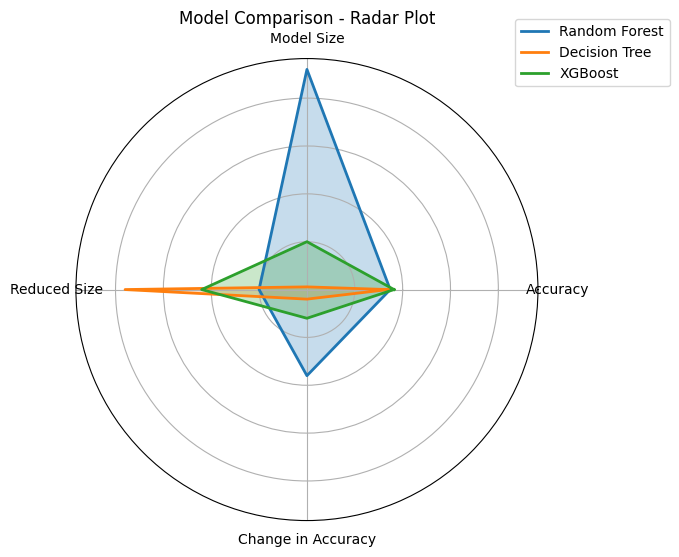

In [28]:
# Define models and values
models = {
    "Random Forest": [0.87, 2.3 , 0.5, 00.9],
    "Decision Tree": [0.85, 0.028, 1.9, 00.1],
    "XGBoost": [0.91, 0.5, 1.1, 00.3]
}
metrics = ["Accuracy" , "Model Size", "Reduced Size", "Change in Accuracy"]

# Convert to radians
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot each model
for model, values in models.items():
    values += values[:1]  # Close the loop
    ax.plot(angles, values, label=model, linewidth=2)
    ax.fill(angles, values, alpha=0.25)  # Fill area

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.title("Model Comparison - Radar Plot")
plt.show()